In [3]:
#import libraries
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

In [96]:
#read in all fixation files
path = "C:/Users/njeri/Documents/Masters/Thesis/Scripts/Data/ads_data/data/fixation_events"
files = glob.glob(path + "/*.csv")

df = pd.concat([pd.read_csv(fp).assign(ind_id=os.path.basename(fp)) for fp in files])

df = df.reset_index(drop = True)

#change id columns to allow for merging with other dataframes later 
df['ind_id_fn'] = df.apply(lambda x: x['ind_id'][:-4], axis = 1)
df['ind_id'] = df.apply(lambda x: x['ind_id_fn'][:-2], axis = 1)

df = df.convert_dtypes()
df.head()

,Unnamed: 0,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,end_x,end_y,ind_id,ind_id_fn
0,0,FIXA,0.482,2.286,5.908,1196.907,950.325,5413.376,905.4,801.2,899.5,800.9,202001301336306,20200130133630607
1,1,SACC,2.768,0.968,459.409,28946.097,23040.928,63583.971,899.5,800.9,460.9,937.6,202001301336306,20200130133630607
2,2,FIXA,3.736,1.117,17.751,2219.579,2167.43,5492.761,460.9,937.6,451.9,952.9,202001301336306,20200130133630607
3,3,SACC,4.853,0.083,11.901,8741.39,8603.753,10288.336,451.9,952.9,446.9,963.7,202001301336306,20200130133630607
4,4,FIXA,4.936,0.401,21.785,3974.448,4475.006,6968.503,446.9,963.7,464.6,951.0,202001301336306,20200130133630607


In [5]:
#load demographics
info = pd.read_csv("C:/Users/njeri/Documents/Masters/Thesis/Scripts/Data/ads_data/participant_info.csv",dtype = {'ID':str})
info = info.convert_dtypes()
#shorten id column to merge with fixations
info['ID'] = info['ID'].str[:-2]
info.head()

,Unnamed: 0,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
0,0,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
1,1,202001301439365,FEMALE,1971,WomanOnBoat,BoatSunset,Turtle,1,True,True
2,2,202001301448294,MALE,1968,Woman,Mermaid,Pierce,1,True,True
3,3,202001301453479,FEMALE,1974,WomanOnBoat,Mermaid,Turtle,1,False,False
4,4,202001301502271,MALE,1966,WomanOnBoat,Woman,Spaceship,1,True,True


In [6]:
#check both files have same number of fixations
print(len(df.ind_id.unique()))
print(len(info.ID.unique()))

5604
5604


In [97]:
#merge participant data with fixations on the id column
df_1 = df.merge(info, left_on = 'ind_id', right_on = 'ID', how = 'left')
df_1 = df_1.drop(columns = ['Unnamed: 0_y','ind_id'])
df_1

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
0,0,FIXA,0.482,2.286,5.908,1196.907,950.325,5413.376,905.4,801.2,...,20200130133630607,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
1,1,SACC,2.768,0.968,459.409,28946.097,23040.928,63583.971,899.5,800.9,...,20200130133630607,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
2,2,FIXA,3.736,1.117,17.751,2219.579,2167.43,5492.761,460.9,937.6,...,20200130133630607,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
3,3,SACC,4.853,0.083,11.901,8741.39,8603.753,10288.336,451.9,952.9,...,20200130133630607,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
4,4,FIXA,4.936,0.401,21.785,3974.448,4475.006,6968.503,446.9,963.7,...,20200130133630607,202001301336306,FEMALE,1989,BoatSunset,Spaceship,FatherSonBoat,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92739,18,FIXA,6.223,2.352,472.926,21882.335,17831.432,89817.653,635.5,207.0,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92740,19,none,8.575,0.05,59.785,74574.709,75220.019,80559.79,227.0,445.3,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92741,20,FIXA,8.625,0.768,262.889,31819.846,31710.265,63082.434,198.4,497.8,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92742,21,SACC,9.393,0.25,525.338,124786.388,126182.854,174136.323,410.0,653.8,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True


In [98]:
#filter out all version 1 data
df_1 = df_1[df_1.Version != 1]
df_1

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
25733,0,FIXA,0.017,0.317,126.954,28728.004,26283.13,48526.959,930.9,500.6,...,20210709153830113,202107091538301,FEMALE,2001,Mermaid,BoatSunset,Woman,2,False,True
25734,1,SACC,0.334,0.166,290.879,105455.346,107001.001,130737.393,916.2,626.7,...,20210709153830113,202107091538301,FEMALE,2001,Mermaid,BoatSunset,Woman,2,False,True
25735,2,FIXA,0.5,0.1,92.532,60785.652,60305.92,73691.169,1175.2,759.1,...,20210709153830113,202107091538301,FEMALE,2001,Mermaid,BoatSunset,Woman,2,False,True
25736,3,SACC,0.6,0.167,299.093,107409.043,111189.624,128914.454,1265.5,779.3,...,20210709153830113,202107091538301,FEMALE,2001,Mermaid,BoatSunset,Woman,2,False,True
25737,4,FIXA,0.767,0.568,264.117,35029.077,35154.496,69807.046,1437.2,534.4,...,20210709153830113,202107091538301,FEMALE,2001,Mermaid,BoatSunset,Woman,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92739,18,FIXA,6.223,2.352,472.926,21882.335,17831.432,89817.653,635.5,207.0,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92740,19,none,8.575,0.05,59.785,74574.709,75220.019,80559.79,227.0,445.3,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92741,20,FIXA,8.625,0.768,262.889,31819.846,31710.265,63082.434,198.4,497.8,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True
92742,21,SACC,9.393,0.25,525.338,124786.388,126182.854,174136.323,410.0,653.8,...,20220203163941517,202202031639415,FEMALE,1994,FatherSonBoat,Clouds,Pierce,2,False,True


In [99]:
#filter to only valid demographics
df_valid = df_1[df_1.Valid == True]
df_valid

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
25831,0,FIXA,0.25,0.551,313.573,40826.862,44764.193,75292.545,598.6,151.2,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25832,1,SACC,0.801,0.8,1295.054,132173.379,126364.076,264489.014,288.8,199.7,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25833,2,FIXA,1.601,0.234,185.899,53657.666,54551.878,60829.6,1437.0,798.7,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25834,3,SACC,1.835,0.284,832.092,184255.205,186374.358,287216.559,1292.7,915.9,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25835,4,FIXA,2.119,0.167,106.225,41148.425,37710.971,61554.509,461.1,944.5,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92676,14,FIXA,3.619,1.836,416.486,33179.295,35869.391,79461.44,703.5,508.3,...,20220203141056170,202202031410561,FEMALE,1992,Woman,Turtle,Pierce,2,True,True
92677,15,SACC,5.455,0.083,119.815,87096.953,86541.647,90624.9,614.2,101.5,...,20220203141056170,202202031410561,FEMALE,1992,Woman,Turtle,Pierce,2,True,True
92678,16,FIXA,5.538,1.502,408.279,25859.924,21551.641,77553.157,732.7,83.8,...,20220203141056170,202202031410561,FEMALE,1992,Woman,Turtle,Pierce,2,True,True
92679,17,SACC,7.04,0.067,95.476,86274.627,86930.882,89275.316,1133.9,159.5,...,20220203141056170,202202031410561,FEMALE,1992,Woman,Turtle,Pierce,2,True,True


In [84]:
#select only relevant demographic data
demos = df_valid[['ID', 'Gender', 'DoB']]
demos = demos.drop_duplicates()
demos

,ID,Gender,DoB
0,202107101214363,MALE,1974
11932,202107101432200,FEMALE,1999
21754,202107101444503,MALE,1978
31937,202107101528378,MALE,1994
41300,202107111045352,MALE,1975
...,...,...,...
6682294,202202021421043,MALE,1994
6693159,202202021451373,FEMALE,2003
6705534,202202021541405,MALE,2008
6718534,202202021545249,FEMALE,1973


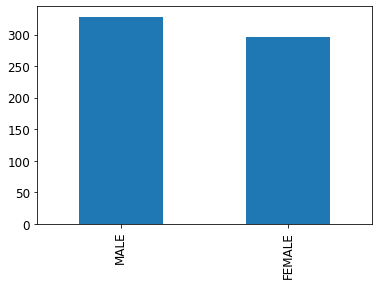

In [85]:
#check gender distribution
demos['Gender'].value_counts().plot(kind='bar');

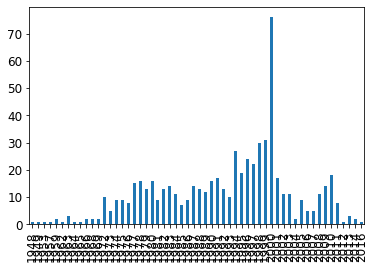

In [86]:
#check age distribution
demos['DoB'].value_counts().sort_index().plot(kind='bar');

In [100]:
#create new dataframe with only participant with year of birth 2000
df_2000 = df_valid[df_valid.DoB == 2000]
df_2000.head()

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
26433,0,FIXA,0.018,0.132,35.967,44153.019,39060.276,100193.371,866.5,546.0,...,20210711121139103,202107111211391,FEMALE,2000,Turtle,WomanOnBoat,Mermaid,2,True,True
26434,1,none,0.15,0.05,94.882,112057.409,112502.526,113942.477,837.3,525.0,...,20210711121139103,202107111211391,FEMALE,2000,Turtle,WomanOnBoat,Mermaid,2,True,True
26435,2,FIXA,0.2,2.319,516.444,36412.593,31133.79,99787.303,810.1,434.1,...,20210711121139103,202107111211391,FEMALE,2000,Turtle,WomanOnBoat,Mermaid,2,True,True
26436,3,SACC,2.519,0.134,320.001,144187.254,142964.28,166896.132,296.2,485.3,...,20210711121139103,202107111211391,FEMALE,2000,Turtle,WomanOnBoat,Mermaid,2,True,True
26437,4,FIXA,2.653,0.517,290.376,47719.425,42201.298,100747.016,210.1,793.5,...,20210711121139103,202107111211391,FEMALE,2000,Turtle,WomanOnBoat,Mermaid,2,True,True


In [88]:
#unique list of ids of participants with year of birth 2000
df_2000.ID.unique()

<StringArray>
['202107111211391', '202107131149387', '202107151119490', '202107151158384',
 '202107171344151', '202107181246134', '202107181456227', '202107191047026',
 '202107191135235', '202107200943006', '202107201339039', '202107261237005',
 '202107261439360', '202107281420360', '202107291524411', '202107301605453',
 '202108011525348', '202108021107428', '202108071042280', '202108081342453',
 '202108091248254', '202108111404282', '202108161536540', '202108171313351',
 '202108201347298', '202108211322124', '202108241355377', '202108261104547',
 '202108271511048', '202108281122189', '202108281413467', '202108291327259',
 '202108291442192', '202108311529110', '202109021233508', '202109041605443',
 '202109171250187', '202109301112162', '202110011524045', '202110021111216',
 '202110091530348', '202110141207068', '202110161147430', '202110171204533',
 '202110171359566', '202110181548573', '202110181554020', '202110201523499',
 '202110211202385', '202110211457443', '202110221316393', '202

In [16]:
#check one participants fixations & saccades
df_2000[df_2000.ID == '202107131149387']

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
27419,0,FIXA,0.017,0.283,130.924,34555.508,37230.963,65553.27,862.1,682.0,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27420,1,SACC,0.3,0.117,166.367,85967.134,85156.537,93819.79,902.3,806.6,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27421,2,FIXA,0.417,0.268,139.839,51950.895,54236.108,74161.716,1064.5,769.6,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27422,3,SACC,0.685,0.116,166.9,86133.265,87959.563,94467.085,1193.7,823.1,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27423,4,FIXA,0.801,0.417,139.624,28593.492,21461.188,66873.598,1026.8,822.7,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27424,5,SACC,1.218,0.2,345.177,103647.056,101057.158,139812.129,887.9,836.9,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27425,6,FIXA,1.418,0.868,131.603,12659.388,7565.579,56537.608,1217.1,940.7,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27426,7,SACC,2.286,0.233,590.112,152359.655,152227.762,230598.467,1344.1,975.2,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27427,8,FIXA,2.519,0.434,148.815,25475.63,20302.647,54815.09,1439.8,392.9,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True
27428,9,SACC,2.953,0.083,113.818,81405.384,83331.595,103279.463,1497.2,255.6,...,20210713114938710,202107131149387,MALE,2000,Turtle,Spaceship,FatherSonBoat,2,True,True


In [17]:
#check number of these ids with fixation duration above 2.5
test = df_2000[df_2000.duration > 2.5]

In [18]:
test.ID.unique()

<StringArray>
['202107111211391', '202107151119490', '202107171344151', '202107181246134',
 '202107191135235', '202107201339039', '202107261237005', '202107291524411',
 '202107301605453', '202108071042280', '202108111404282', '202108161536540',
 '202108211322124', '202108261104547', '202108281413467', '202108311529110',
 '202109021233508', '202109301112162', '202110021111216', '202110141207068',
 '202110161147430', '202110171204533', '202110181554020', '202110201523499',
 '202110211202385', '202110221455375', '202110261329573', '202110291348362',
 '202110301420441', '202111011242150', '202111011612134', '202111021117209',
 '202111041714176', '202111062307200', '202111131201322', '202111161347314',
 '202112041247283', '202112121222364', '202112151404154']
Length: 39, dtype: string

In [20]:
df_valid[df_valid.ID == '202107201343374']

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
30732,0,FIXA,1.451,0.084,14.418,11951.115,11870.873,13559.589,1738.4,705.0,...,20210720134337408,202107201343374,FEMALE,2010,Octopus,Elephant,Pierce,2,True,True
30733,1,SACC,1.535,1.067,1618.926,91640.064,55482.477,372255.242,1740.9,690.8,...,20210720134337408,202107201343374,FEMALE,2010,Octopus,Elephant,Pierce,2,True,True
30734,2,FIXA,2.602,3.037,38.604,3507.951,1824.271,12288.516,198.1,200.2,...,20210720134337408,202107201343374,FEMALE,2010,Octopus,Elephant,Pierce,2,True,True
30735,3,SACC,5.639,0.4,282.392,43058.078,40467.641,77063.236,160.1,207.0,...,20210720134337408,202107201343374,FEMALE,2010,Octopus,Elephant,Pierce,2,True,True
30736,4,FIXA,6.039,3.921,79.128,5267.215,4751.424,13726.13,438.9,162.1,...,20210720134337408,202107201343374,FEMALE,2010,Octopus,Elephant,Pierce,2,True,True


In [27]:
#create column that contains end time of each fixation
df_valid['end_time'] = df_valid.onset + df_valid.duration
df_valid.head()

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing,count,end_time
0,0,FIXA,0.25,0.551,313.573,40826.862,44764.193,75292.545,598.6,151.2,...,MALE,1974,Turtle,Mermaid,Pierce,2,True,True,17,0.801
1,1,SACC,0.801,0.8,1295.054,132173.379,126364.076,264489.014,288.8,199.7,...,MALE,1974,Turtle,Mermaid,Pierce,2,True,True,17,1.601
2,2,FIXA,1.601,0.234,185.899,53657.666,54551.878,60829.6,1437.0,798.7,...,MALE,1974,Turtle,Mermaid,Pierce,2,True,True,17,1.835
3,3,SACC,1.835,0.284,832.092,184255.205,186374.358,287216.559,1292.7,915.9,...,MALE,1974,Turtle,Mermaid,Pierce,2,True,True,17,2.119
4,4,FIXA,2.119,0.167,106.225,41148.425,37710.971,61554.509,461.1,944.5,...,MALE,1974,Turtle,Mermaid,Pierce,2,True,True,17,2.286


In [28]:
#create new data frame with only fixation data
fixa = df_valid[df_valid.label == 'FIXA']

In [39]:
#filter dataset of participants on only valid freeviewing entries
df_2000[df_2000['Valid Freeviewing'] == True].sort_values(by = 'duration',ascending = False)

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
35033,10,FIXA,4.305,5.689,825.007,37730.601,29676.181,112442.709,903.6,143.6,...,20210729152441157,202107291524411,MALE,2000,Woman,FatherSonBoat,Pierce,2,True,True
64516,2,FIXA,2.102,5.289,702.695,81275.569,68161.911,221417.046,731.1,687.5,...,20211017120453340,202110171204533,MALE,2000,Pierce,FatherSonBoat,WomanOnBoat,2,True,True
28319,0,FIXA,0.017,5.155,744.466,62209.775,54287.616,158857.292,923.0,565.6,...,20210715111949008,202107151119490,FEMALE,2000,Pierce,BoatSunset,Clouds,2,True,True
30280,4,FIXA,1.268,5.155,236.315,66385.446,59150.711,181876.208,547.0,520.8,...,20210719113523588,202107191135235,FEMALE,2000,Elephant,WomanOnBoat,Woman,2,True,True
48214,4,FIXA,2.152,4.605,591.641,42001.559,38716.437,114412.564,893.9,149.6,...,20210831152911064,202108311529110,MALE,2000,Mermaid,Octopus,Man,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50068,17,none,8.509,0.033,50.136,91536.817,91536.817,91899.425,701.6,402.2,...,20210904160544300,202109041605443,FEMALE,2000,WomanOnBoat,Pierce,Spaceship,2,True,True
64722,21,none,9.56,0.033,30.553,56043.995,56043.995,56501.103,1685.3,467.1,...,20211017135956603,202110171359566,MALE,2000,Pierce,Woman,Elephant,2,True,True
54371,15,none,7.273,0.033,91.679,165528.055,165528.055,167004.87,869.7,137.4,...,20210917125018716,202109171250187,MALE,2000,Woman,Mermaid,BoatSunset,2,True,True
64702,1,none,0.234,0.033,43.963,80722.333,80722.333,81429.68,849.2,474.7,...,20211017135956603,202110171359566,MALE,2000,Pierce,Woman,Elephant,2,True,True


In [40]:
#filter dataset on only valid freeviewing & valid demographics entries

df_valid = df_valid[(df_valid.Valid == True) & (df_valid['Valid Freeviewing'] == True)]

In [41]:
# list of ids in valid dataset
df_valid.ind_id_fn.unique()

<StringArray>
['20210710121436356', '20210710143220018', '20210710144450335',
 '20210710152837828', '20210711104535214', '20210711121139103',
 '20210711131101810', '20210711131742327', '20210712115116969',
 '20210712132956448',
 ...
 '20220130123437207', '20220130150324039', '20220130153744364',
 '20220201141038318', '20220202115510893', '20220202142104382',
 '20220202145137379', '20220202154140594', '20220202154524952',
 '20220203141056170']
Length: 624, dtype: string

In [101]:
#list of ids of participants with year of birth 2000
list_2000 = df_2000.ID.unique()

In [102]:
#chose random sample of people with year of birth 2000
downsampled_2000 = np.random.choice(list_2000,33,replace=False)

In [103]:
downsampled_2000

array(['202111062307200', '202110301609296', '202109171250187',
       '202110301420441', '202111041714176', '202108261104547',
       '202107301605453', '202109041605443', '202108271511048',
       '202110261140207', '202109021233508', '202110211457443',
       '202107201339039', '202108081342453', '202111021117209',
       '202107191047026', '202110091530348', '202108201347298',
       '202112141410226', '202110161147430', '202110211202385',
       '202110311517000', '202107171344151', '202110171359566',
       '202110221455375', '202107291524411', '202110181554020',
       '202108291327259', '202107281420360', '202108021107428',
       '202110221316393', '202107181456227', '202110011524045'],
      dtype=object)

In [104]:
#create dataframe with selected ids only
df_temp = df_2000[df_2000.ID.isin(downsampled_2000)]

In [105]:
#combine both dataframes to create final data for analysis

df_total = pd.concat([df_valid,df_temp])

In [108]:
#save dataframe to csv
df_total.to_csv('Data/total_data.csv')

In [106]:
df_total

,Unnamed: 0_x,label,onset,duration,amp,avg_vel,med_vel,peak_vel,start_x,start_y,...,ind_id_fn,ID,Gender,DoB,ROI1,ROI2,ROI3,Version,Valid,Valid Freeviewing
25831,0,FIXA,0.25,0.551,313.573,40826.862,44764.193,75292.545,598.6,151.2,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25832,1,SACC,0.801,0.8,1295.054,132173.379,126364.076,264489.014,288.8,199.7,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25833,2,FIXA,1.601,0.234,185.899,53657.666,54551.878,60829.6,1437.0,798.7,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25834,3,SACC,1.835,0.284,832.092,184255.205,186374.358,287216.559,1292.7,915.9,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
25835,4,FIXA,2.119,0.167,106.225,41148.425,37710.971,61554.509,461.1,944.5,...,20210710121436356,202107101214363,MALE,1974,Turtle,Mermaid,Pierce,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89724,10,FIXA,4.788,1.619,326.803,21114.111,16974.272,55796.253,635.5,159.1,...,20211214141022683,202112141410226,FEMALE,2000,Pierce,Turtle,SwimmingMan,2,True,True
89725,11,none,6.407,0.049,57.13,70287.43,69932.73,73489.861,319.1,240.9,...,20211214141022683,202112141410226,FEMALE,2000,Pierce,Turtle,SwimmingMan,2,True,True
89726,12,FIXA,6.456,0.801,208.67,20758.114,16898.231,60403.186,309.4,297.2,...,20211214141022683,202112141410226,FEMALE,2000,Pierce,Turtle,SwimmingMan,2,True,True
89727,13,SACC,7.257,0.417,1047.247,152101.599,133338.981,245613.572,418.3,475.2,...,20211214141022683,202112141410226,FEMALE,2000,Pierce,Turtle,SwimmingMan,2,True,True
